# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549329406.7


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 10000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 10000 edges out of 229338 available (4.36% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,1887.000000,1887,1887,1887,1872,1874,0.0,273,1662,1637,1637,1365,814,461,117,9,0.0,0.0,0.0,1876,1876,1876,1887.0,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1.887000e+03,1.887000e+03,1887.000000,1887.000000
unique,NaN,1840,1887,1466,7,288,NaN,243,1,1,23,112,185,120,42,5,NaN,NaN,NaN,1876,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/0198769865/,Ian Stewart (Autor),Capa comum,Companhia das Letras,NaN,17 de outubro de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8521631030,978-8590200215,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,12,1508,98,NaN,3,1662,1637,399,283,136,41,14,3,NaN,NaN,NaN,1,1,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1643.043985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,148.906746,58197.556473,412.825546,13.727257,4.481211,15.993920,22.953013,2.305302,467.427140,2.108380e+09,8.119221e-03,9.182830,0.004023
std,1817.245542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,266.318411,74967.622490,269.695568,34.297497,0.496588,2.877004,2.804110,1.213144,209.671432,1.228140e+09,2.103019e-02,18.597254,0.011482
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.900000,7.000000,4.000000,1.000000,1.000000,2.600000,14.000000,0.200000,18.100000,9.916600e+05,8.902568e-08,1.000000,0.000000
25%,509.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.900000,11609.000000,232.000000,3.000000,4.484431,14.000000,21.000000,1.400000,340.000000,1.036745e+09,7.787527e-06,1.000000,0.000000
50%,1218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,56.900000,36009.000000,352.000000,13.782918,4.484431,15.600000,22.900000,2.000000,470.363783,2.092333e+09,6.130131e-05,2.000000,0.000499
75%,1907.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.090000,60184.500000,528.000000,13.782918,4.700000,17.200000,24.100000,2.900000,581.000000,3.143779e+09,2.193281e-03,8.000000,0.003067


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.014272,19,0.010223
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.060501,62,0.005129
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,13.782918,4.484431,14.4,20.8,0.8,200.0,1260550007,0.041809,59,0.043162
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.013503,18,0.011146
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.084038,88,0.023921
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.051176,43,0.012622
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,13.782918,4.484431,13.7,21.5,0.8,159.0,744636978,0.010229,9,0.001020
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.005257,10,0.012655
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,13.782918,4.484431,13.6,20.3,2.3,522.0,1246026773,0.022270,23,0.002799
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.199788023317
Train features shape:  (1510, 2253)
Train target shape:  (1510,)
Test features shape:  (377, 2253)
Test target shape:  (377,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 148.39403973509934
Median parice; R$ 56.9


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.42594003731097463
RF relative abs std:  0.06448418943046091
Baseline (average) relative mean:  2.3618802436253428
Baseline (average) relative std:  0.16285089900408484
Baseline (median) relative mean:  0.737881038078038
Baseline (median) relative std:  0.0762353296786518
=== Absolute
RF abs mean:  58.46066920529802
RF abs std:  13.5313087159355
Baseline (average) mean:  146.15057865883077
Baseline (average) std:  22.519064809610736
Baseline (median) mean:  113.47544370860928
Baseline (median) std:  24.601035570669286


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,coverType_Capa dura,24.018261,3.274944,0.136352
1,eigenvector_centrality,15.927367,5.897480,0.370273
2,pages,10.769259,0.935662,0.086883
3,ranking,6.145061,2.986699,0.486032
4,publisher_McGraw-Hill Science/Engineering/Math,4.844816,1.462012,0.301768
5,width,4.529773,1.384773,0.305705
6,betweenness_centrality,4.089543,1.256070,0.307142
7,height,2.748288,0.564703,0.205474
8,depth,2.162728,0.368084,0.170194
9,degree,2.009974,0.728038,0.362213


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [151, 151, 151, 151, 151, 151, 151, 151, 151, 151]
X shape:  (1510, 2253)
y shape:  (1510,)


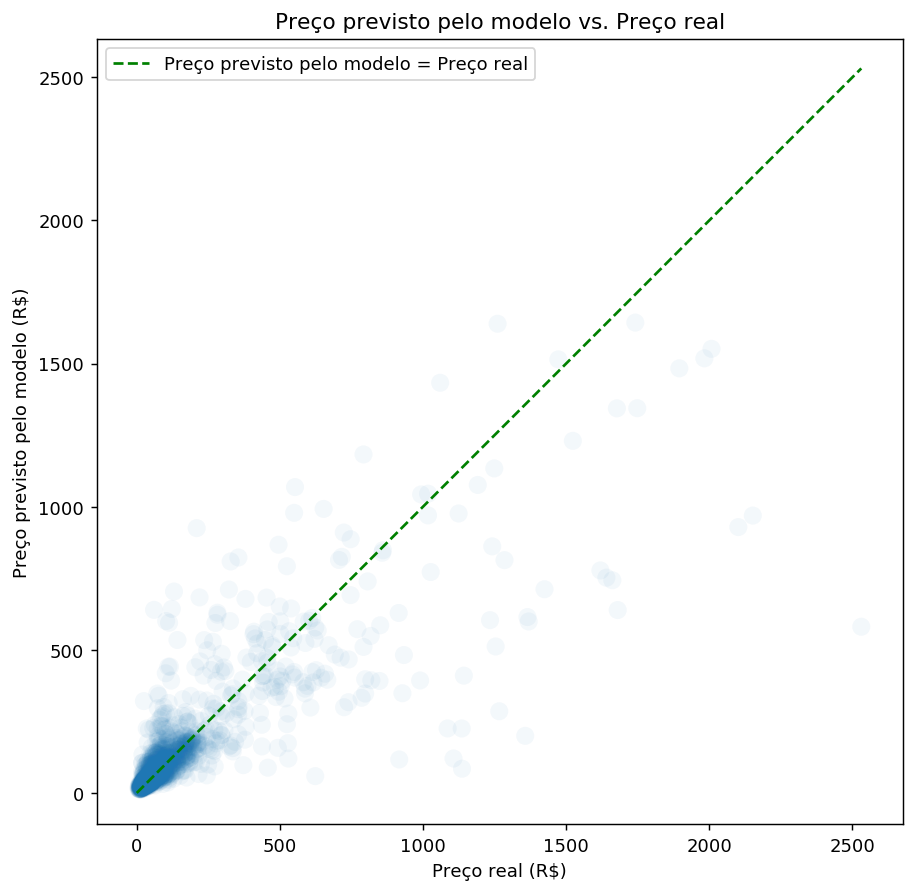

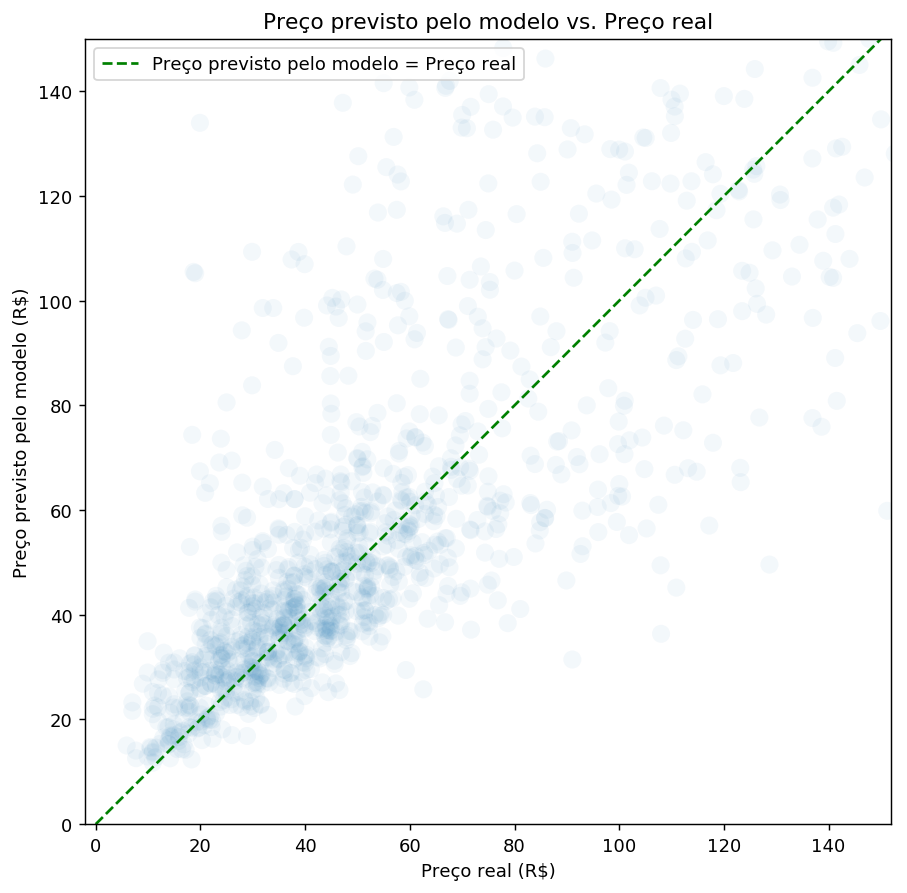

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 58.46)
('Std prediction error: R$', 139.14)
('Mean absolute error using average: R$', 146.15)
('Std prediction error using average: R$', 220.02)
('Mean absolute error using median: R$', 113.48)
('Std prediction error using median: R$', 255.46)
== Relative
('Mean relative absolute prediction error: ', 0.43)
('Std relative prediction error: ', 0.69)
('Mean relative absolute error using average: ', 2.36)
('Std relative prediction error using average: ', 2.59)
('Mean absolute error using median: R$', 0.74)
('Std prediction error using median: R$', 0.79)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0249982911487, 0.0012421...",1950.4330,2382.67596,2474.17,0.977519,0.941371,0.770596,580.6370,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,59185.844728,345.000000,13.782918,4.484431,16.000000,23.100000,2.50000,470.363783,0.024998,13,0.001242
7.945218e+08,"[794521798.0, 1.0, 0.00128028521964, 0.0, 5918...",1183.2105,2003.77596,2095.27,0.973562,0.931049,0.549776,968.9595,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,59185.844728,768.000000,13.782918,4.484431,18.500000,23.900000,3.30000,470.363783,0.001280,1,0.000000
1.144179e+09,"[1144179495.0, 4.0, 0.00424156049248, 0.000328...",1172.7340,1953.14596,2044.64,0.972925,0.929388,0.558036,928.8060,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,59185.844728,432.000000,13.782918,4.484431,16.800000,24.100000,3.30000,921.000000,0.004242,4,0.000329
1.993779e+09,"[1993779221.0, 24.0, 0.0344875756862, 0.002633...",1157.5060,1208.60596,1300.10,0.958069,0.890646,0.852989,199.4940,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.034488,24,0.002633
1.088718e+09,"[1088718135.0, 32.0, 0.0421584506269, 0.003562...",1051.5890,987.88596,1079.38,0.949924,0.869404,0.925466,84.6910,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,59185.844728,224.000000,13.782918,4.484431,14.700000,22.900000,1.20000,308.000000,0.042158,32,0.003563
1.859584e+09,"[1859584463.0, 2.0, 0.00558357466987, 0.000108...",1041.1405,1531.69596,1623.19,0.966133,0.911675,0.619693,638.9495,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,59185.844728,696.000000,13.782918,4.484431,19.000000,23.400000,3.30000,470.363783,0.005584,2,0.000109
3.374043e+09,"[3374042526.0, 2.0, 0.00296182674759, 0.000250...",986.2170,958.21596,1049.71,0.948582,0.865902,0.891206,120.3930,1106.61,1806,Schrödinger's Killer App: Race to Build the Wo...,https://www.amazon.com.br/dp/1138429619/,Jonathan P. Dowling (Autor),NaN,CRC Press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1138429619,978-1138429611,Inglês,1,1106.61,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,771.000000,0.002962,2,0.000250
2.611927e+09,"[2611927292.0, 1.0, 0.00101909418317, 0.0, 591...",980.9970,1117.96596,1209.46,0.955068,0.882818,0.774659,285.3630,1

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.381738e+09,"[2381737828.0, 34.0, 0.00423956673993, 0.05018...",295.8765,123.40404,31.91,1.276911,4.938137,11.839796,320.8665,24.99,207,Meus Últimos Anos. Os Escritos da Maturidade d...,https://www.amazon.com.br/dp/8520935419/,Albert Einstein (Autor),Capa dura,Nova Fronteira,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520935419,978-8520935415,Português,1,24.99,4978.000000,272.000000,3.000000,5.000000,15.800000,23.600000,2.00000,540.000000,0.004240,34,0.050188
3.111996e+09,"[3111995652.0, 1.0, 0.00158936799228, 0.0, 118...",579.2105,87.99404,3.50,0.057947,1.456855,9.589578,639.6105,60.40,1684,Sapiens: A Brief History of Humankind,https://www.amazon.com.br/dp/0062316095/,Yuval Noah Harari (Autor),Capa dura,Harper,NaN,10 de fevereiro de 2015,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Ciências Biológicas,Evolução,NaN,NaN,NaN,NaN,NaN,0062316095,978-0062316097,Inglês,1,60.40,1183.000000,464.000000,44.000000,4.600000,16.300000,22.600000,4.30000,470.363783,0.001589,1,0.000000
4.280491e+09,"[4280491341.0, 1.0, 1.29553419456e-05, 0.0, 59...",114.0745,128.49404,37.00,1.859296,6.456987,5.732387,133.9745,19.90,1506,A Medida Do Mundo,https://www.amazon.com.br/dp/8537811076/,Robert P. Crease (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19.90,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.000013,1,0.000000
2.576533e+09,"[2576533146.0, 1.0, 3.14715923438e-05, 0.0, 33...",190.2725,113.40404,21.91,0.626179,3.241041,5.437911,225.2625,34.99,2862,Explica Tudo. Coisas Difíceis em Palavras Fáceis,https://www.amazon.com.br/dp/8535929533/,Randall Munroe (Autor),Capa dura,Companhia das Letras,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535929533,978-8535929539,Português,1,34.99,331.000000,68.000000,2.000000,4.000000,23.400000,33.600000,1.20000,680.000000,0.000031,1,0.000000
2.318888e+09,"[2318887577.0, 1.0, 0.000794300791393, 0.0, 59...",497.8390,45.66404,45.83,0.446121,0.444505,4.846092,600.5690,102.73,2058,Einstein's Telescope,https://www.amazon.com.br/dp/0393062384/,Evalyn Gates (Autor),Capa dura,W W Norton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0393062384,978-0393062380,Inglês,1,102.73,59185.844728,288.000000,13.782918,4.484431,16.500000,24.400000,2.80000,544.000000,0.000794,1,0.000000
9.535769e+08,"[953576854.0, 69.0, 0.00185246756675, 0.039689...",86.8000,129.69404,38.20,2.042781,6.935510,4.641711,105.5000,18.70,129,50 Ideias de Física Quântica,https://www.amazon.com.br/dp/8542206045/,Joanne Baker (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,18.70,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.001852,69,0.039690
1.123179e+09,"[1123179230.0, 8.0, 0.000219834640277, 0.00275...",86.2535,129.40404,37.91,1.996314,6.814325,4.542048,105.2435,18.99,424,O Livro de Ouro do Universo,https://www.amazon.com.br/dp/8569809832/,Ronaldo Rogério de Freitas Mourão (Autor),Capa comum,HarperCollins Brasil,NaN,NaN,Livros,Livros,Ciências,Astronomia e Ciência Espacial,Astronomia,NaN,NaN,NaN,NaN,NaN,NaN,8569809832,978-8569809838,Português,1,18.99,2813.000000,528.000000,2.000000,4.000000,17.000000,23.800000,2.60000,780.000000,0.000220,8,0.002760
2.150499e+09,"[2150499263.0, 6.0, 0.0130063558535, 0.0004991...",573.5815,18.28404,73.21,0.562678,0.140528,4.408435,703.6915,130.11,1866,Unsolved! – The History and Mystery of the Wor...,

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.215608e+09,"[3215608107.0, 1.0, 3.12155885713e-05, 0.0, 26...",0.0010,120.49404,29.00,1.039427,4.318783,0.000036,27.9010,27.90,2747,O Fim Da Eternidade,https://www.amazon.com.br/dp/8576570416/,Isaac Asimov (Autor),Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,Aventura,NaN,NaN,NaN,NaN,NaN,NaN,8576570416,978-8576570417,Português,1,27.90,2645.0,256.0,71.000000,4.500000,13.7,21.1,1.5,322.000000,0.000031,1,0.000000
2.092704e+09,"[2092703593.0, 1.0, 3.05992791933e-06, 0.0, 20...",0.0085,112.29404,20.80,0.576177,3.110638,0.000235,36.1085,36.10,1264,Meus Filósofos,https://www.amazon.com.br/dp/8520506747/,Edgar Morin (Autor),Capa comum,Sulina,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520506747,978-8520506745,Português,1,36.10,20463.0,175.0,1.000000,5.000000,14.2,20.6,1.0,499.000000,0.000003,1,0.000000
1.426070e+09,"[1426069586.0, 1.0, 3.7129748552e-06, 0.0, 180...",0.0230,115.57404,24.08,0.733699,3.521452,0.000701,32.8430,32.82,1229,Visões de Descartes,https://www.amazon.com.br/dp/8567394058/,Olavo de Carvalho (Autor),Capa comum,Vide,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Moderna,NaN,NaN,NaN,NaN,NaN,NaN,8567394058,978-8567394053,Português,1,32.82,18039.0,152.0,9.000000,4.100000,15.6,23.0,0.6,240.000000,0.000004,1,0.000000
1.018321e+09,"[1018320933.0, 1.0, 3.01446395394e-05, 0.0, 52...",0.0390,115.40404,23.91,0.724765,3.498152,0.001182,32.9510,32.99,3541,As Aventuras Científicas De Sherlock Holmes,https://www.amazon.com.br/dp/8571106371/,Colin Bruce (Autor),Capa comum,Zahar,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571106371,978-8571106376,Português,1,32.99,52651.0,256.0,3.000000,3.600000,16.0,22.8,1.4,381.000000,0.000030,1,0.000000
2.705191e+09,"[2705191201.0, 6.0, 0.00629452433187, 0.004254...",0.0690,105.48404,13.99,0.326031,2.458262,0.001608,42.9790,42.91,1462,Genomics: A Very Short Introduction,https://www.amazon.com.br/dp/0198786204/,John M. Archibald (Autor),Capa comum,OUP Oxford,NaN,22 de março de 2018,Livros,Livros,Inglês e Outras Línguas,Medicina,Ciência Básica,Genética,NaN,NaN,NaN,NaN,NaN,0198786204,978-0198786207,Inglês,1,42.91,308981.0,160.0,13.782918,4.484431,10.9,17.0,1.5,118.000000,0.006295,6,0.004255
1.287904e+09,"[1287903691.0, 2.0, 3.85324893059e-05, 0.00605...",0.0745,132.59404,41.10,2.601266,8.392028,0.004715,15.8745,15.80,684,O Príncipe,https://www.amazon.com.br/dp/8572328556/,"Nicolau Maquiavel (Autor),",Capa comum,Martin Claret,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,Europeia,NaN,NaN,NaN,NaN,NaN,NaN,8572328556,978-8572328555,Português,1,15.80,537.0,176.0,7.000000,4.300000,11.4,18.2,1.0,141.000000,0.000039,2,0.006050
1.074491e+09,"[1074491370.0, 1.0, 3.05992791933e-06, 0.0, 21...",0.0865,130.09404,38.60,2.109290,7.108964,0.004727,18.3865,18.30,1279,O Mal-Estar na Civilização,https://www.amazon.com.br/dp/8563560301/,Sigmund Freud (Autor),Capa comum,Penguin,NaN,NaN,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,Psicanálise,NaN,NaN,NaN,NaN,NaN,NaN,8563560301,978-8563560308,Português,1,18.30,2193.0,96.0,34.000000,4.400000,12.6,19.8,0.6,99.800000,0.000003,1,0.000000
1.284332e+09,"[1284332396.0, 6.0, 0.000153869253555, 0.00221...",0.1040,87.37404,4.12,0.067519,1.431892,0.001704,60.9160,61.02,415,O Relojoeiro Cego,https://www.amazon.com.br/dp/8535901612/,Richard Dawkins (Autor),Capa comum,Companhia das Letra

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.215608e+09,"[3215608107.0, 1.0, 3.12155885713e-05, 0.0, 26...",0.0010,120.49404,29.00,1.039427,4.318783,0.000036,27.9010,27.90,2747,O Fim Da Eternidade,https://www.amazon.com.br/dp/8576570416/,Isaac Asimov (Autor),Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,Aventura,NaN,NaN,NaN,NaN,NaN,NaN,8576570416,978-8576570417,Português,1,27.90,2645.0,256.0,71.000000,4.500000,13.7,21.1,1.5,322.000000,0.000031,1,0.000000
2.092704e+09,"[2092703593.0, 1.0, 3.05992791933e-06, 0.0, 20...",0.0085,112.29404,20.80,0.576177,3.110638,0.000235,36.1085,36.10,1264,Meus Filósofos,https://www.amazon.com.br/dp/8520506747/,Edgar Morin (Autor),Capa comum,Sulina,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520506747,978-8520506745,Português,1,36.10,20463.0,175.0,1.000000,5.000000,14.2,20.6,1.0,499.000000,0.000003,1,0.000000
1.426070e+09,"[1426069586.0, 1.0, 3.7129748552e-06, 0.0, 180...",0.0230,115.57404,24.08,0.733699,3.521452,0.000701,32.8430,32.82,1229,Visões de Descartes,https://www.amazon.com.br/dp/8567394058/,Olavo de Carvalho (Autor),Capa comum,Vide,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Moderna,NaN,NaN,NaN,NaN,NaN,NaN,8567394058,978-8567394053,Português,1,32.82,18039.0,152.0,9.000000,4.100000,15.6,23.0,0.6,240.000000,0.000004,1,0.000000
1.018321e+09,"[1018320933.0, 1.0, 3.01446395394e-05, 0.0, 52...",0.0390,115.40404,23.91,0.724765,3.498152,0.001182,32.9510,32.99,3541,As Aventuras Científicas De Sherlock Holmes,https://www.amazon.com.br/dp/8571106371/,Colin Bruce (Autor),Capa comum,Zahar,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571106371,978-8571106376,Português,1,32.99,52651.0,256.0,3.000000,3.600000,16.0,22.8,1.4,381.000000,0.000030,1,0.000000
2.705191e+09,"[2705191201.0, 6.0, 0.00629452433187, 0.004254...",0.0690,105.48404,13.99,0.326031,2.458262,0.001608,42.9790,42.91,1462,Genomics: A Very Short Introduction,https://www.amazon.com.br/dp/0198786204/,John M. Archibald (Autor),Capa comum,OUP Oxford,NaN,22 de março de 2018,Livros,Livros,Inglês e Outras Línguas,Medicina,Ciência Básica,Genética,NaN,NaN,NaN,NaN,NaN,0198786204,978-0198786207,Inglês,1,42.91,308981.0,160.0,13.782918,4.484431,10.9,17.0,1.5,118.000000,0.006295,6,0.004255
1.287904e+09,"[1287903691.0, 2.0, 3.85324893059e-05, 0.00605...",0.0745,132.59404,41.10,2.601266,8.392028,0.004715,15.8745,15.80,684,O Príncipe,https://www.amazon.com.br/dp/8572328556/,"Nicolau Maquiavel (Autor),",Capa comum,Martin Claret,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,Europeia,NaN,NaN,NaN,NaN,NaN,NaN,8572328556,978-8572328555,Português,1,15.80,537.0,176.0,7.000000,4.300000,11.4,18.2,1.0,141.000000,0.000039,2,0.006050
1.074491e+09,"[1074491370.0, 1.0, 3.05992791933e-06, 0.0, 21...",0.0865,130.09404,38.60,2.109290,7.108964,0.004727,18.3865,18.30,1279,O Mal-Estar na Civilização,https://www.amazon.com.br/dp/8563560301/,Sigmund Freud (Autor),Capa comum,Penguin,NaN,NaN,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,Psicanálise,NaN,NaN,NaN,NaN,NaN,NaN,8563560301,978-8563560308,Português,1,18.30,2193.0,96.0,34.000000,4.400000,12.6,19.8,0.6,99.800000,0.000003,1,0.000000
1.284332e+09,"[1284332396.0, 6.0, 0.000153869253555, 0.00221...",0.1040,87.37404,4.12,0.067519,1.431892,0.001704,60.9160,61.02,415,O Relojoeiro Cego,https://www.amazon.com.br/dp/8535901612/,Richard Dawkins (Autor),Capa comum,Companhia das Letra

### Relative errors distribution

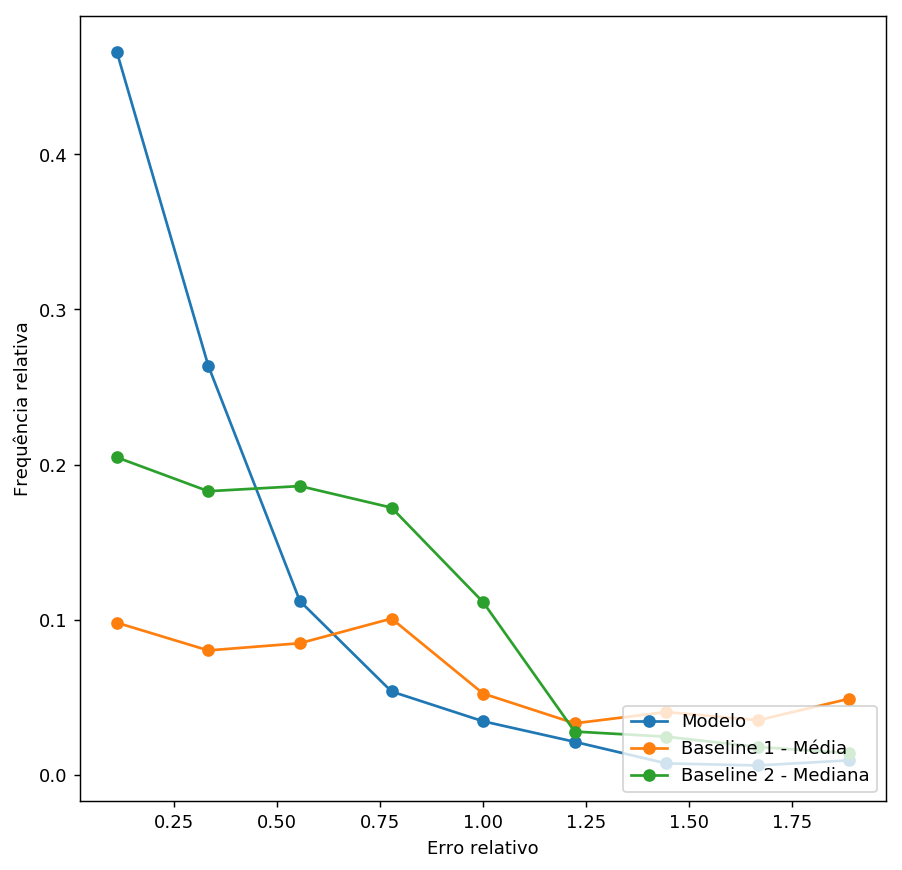

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

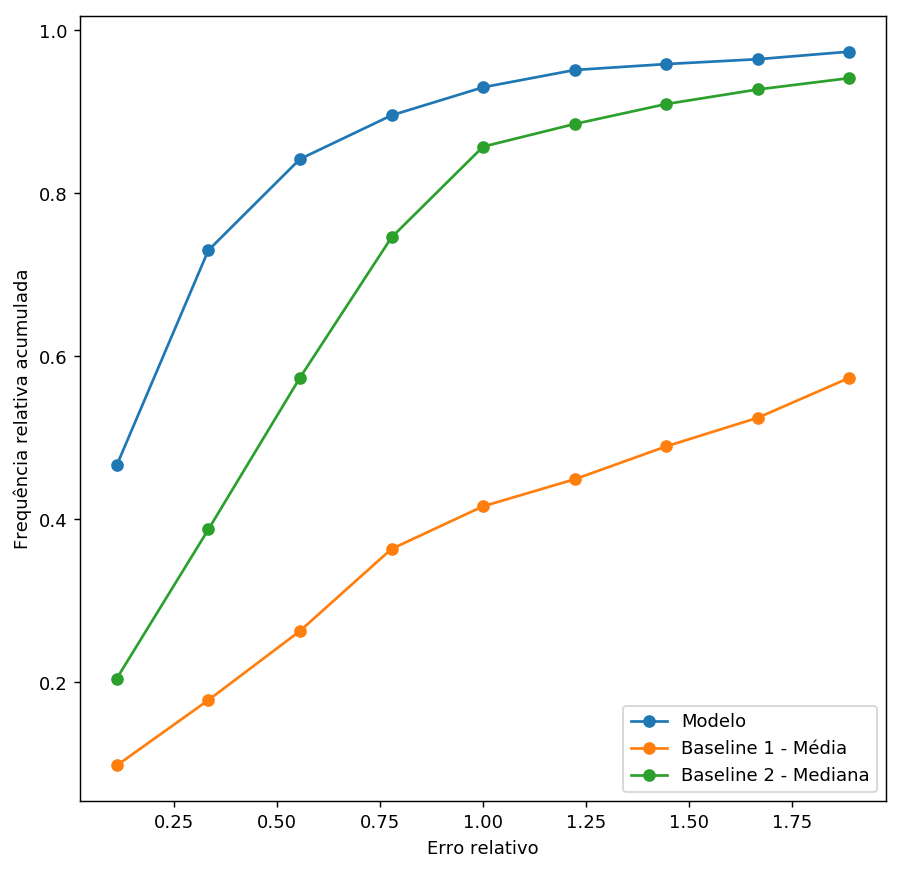

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,0.0,0.0,0.0,0.0,1510.0,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000,1510.000000
mean,58.460669,146.150579,113.475444,0.737881,2.361880,0.425940,138.608160,148.394040,1624.221854,NaN,NaN,NaN,NaN,1.0,148.394040,56976.743993,415.384276,14.099465,4.487438,15.991140,22.959574,2.316537,471.830819,8.128663e-03,9.411258,0.004140
std,139.190282,220.089194,255.548229,0.791456,2.586790,0.689550,202.881404,264.222255,1796.018954,NaN,NaN,NaN,NaN,0.0,264.222255,74215.389530,273.607548,37.053034,0.498628,2.825723,2.776287,1.208378,211.294778,2.151367e-02,19.570295,0.012145
min,0.001000,0.594040,0.000000,0.000000,0.004019,0.000036,11.744500,5.900000,2.000000,NaN,NaN,NaN,NaN,1.0,5.900000,7.000000,6.000000,1.000000,1.000000,2.800000,14.000000,0.200000,18.100000,8.902568e-08,1.000000,0.000000
25%,5.626000,73.494040,14.175000,0.267261,0.636497,0.106578,38.480250,35.422500,498.250000,NaN,NaN,NaN,NaN,1.0,35.422500,11413.750000,240.000000,3.000000,4.484431,14.000000,21.000000,1.400000,340.000000,9.277437e-06,1.000000,0.000000
50%,14.561000,103.624040,29.150000,0.581215,1.607980,0.240477,60.587000,56.900000,1201.500000,NaN,NaN,NaN,NaN,1.0,56.900000,35048.500000,353.500000,13.782918,4.484431,15.700000,22.900000,2.100000,470.363783,5.878479e-05,2.000000,0.000497
75%,45.738000,123.404040,70.162500,0.892557,3.189264,0.482156,140.970125,127.062500,1888.750000,NaN,NaN,NaN,NaN,1.0,127.062500,59185.844728,536.000000,13.782918,4.800000,17.100000,24.000000,3.000000,581.000000,2.104841e-03,8.000000,0.003090
85%,85.318600,133.476540,155.517500,1.039427,4.318783,0.694824,220.147350,212.417500,2214.950000,NaN,NaN,NaN,NaN,1.0,212.417500,93838.350000,648.000000,13.782918,5.000000,20.000000,26.000000,3.400000,715.250000,1.436062e-02,17.000000,0.005977
90%,139.352650,206.735960,298.230000,1.435186,5.350914,0.910972,353.649050,355.130000,3226.600000,NaN,NaN,NaN,NaN,1.0,355.130000,136276.400000,746.200000,15.100000,5.000000,20.600000,27.400000,3.800000,780.000000,3.036107e-02,25.000000,0.009271
95%,274.981575,470.607460,562.101500,2.162868,7.248696,1.326994,555.173175,619.001500,6492.100000,NaN,NaN,NaN,NaN,1.0,619.001500,228995.550000,902.200000,31.000000,5.000000,21.000000,27.800000,4.400000,880.000000,5.174737e-02,45.550000,0.018923


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
37.9856278896


<img src="files/image.png">